<H2> USA Data Set Analysis </H2>

In [40]:
import matplotlib as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=(15,5)
df= pd.read_csv("USA_cars_datasets.csv", header=0)
df.head()

,price,brand,model,year,title_status,mileage,color,state,country
0,6300.0,toyota,cruiser,2008,clean vehicle,274117,black,new jersey,usa
1,2899.0,ford,se,2011,clean vehicle,190552,silver,tennessee,usa
2,5350.0,dodge,mpv,2018,clean vehicle,39590,silver,georgia,usa
3,25000.0,ford,door,2014,clean vehicle,64146,blue,virginia,usa
4,27700.0,chevrolet,1500,2018,clean vehicle,6654,red,florida,usa


<AxesSubplot:>

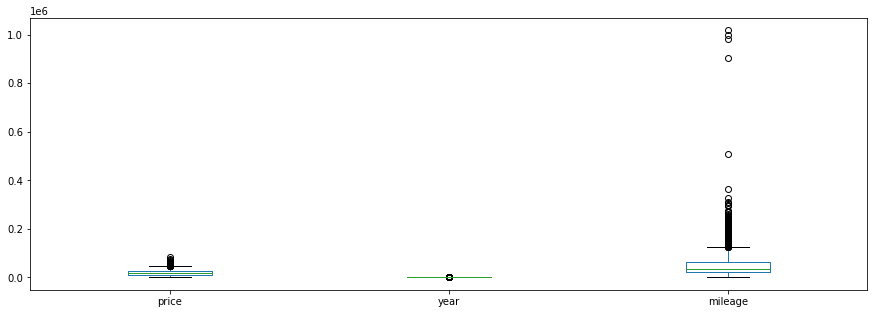

In [27]:
df.plot(kind="box")

<b>Q1. In the US, what is the average price per car in each state? Order this in descending order.<b>

In [44]:
df["price"]= df["price"].astype(int)
usa= df.loc[(df['country']==' usa')].groupby(by='state').price.mean().sort_values(ascending=False)
usa= pd.DataFrame(usa)
usa.head()

,price
state,
kentucky,44969.444444
new mexico,27375.000000
washington,26771.428571
illinois,26715.707965
michigan,23899.822485


<b> Q2. What is the average price per car brand within the US? Plot this out in a Bar Plot in descending order.</b>

Text(0.5, 1.0, 'average price per car brand within the US')

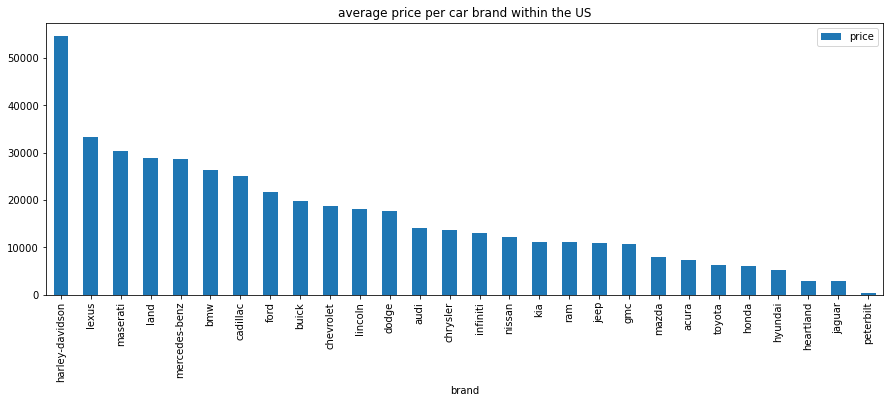

In [48]:
usa_2= df.loc[(df['country']==' usa')].groupby(by='brand').price.mean().sort_values(ascending=False)
usa_2= pd.DataFrame(usa_2)
usa_2.head()
usa_2.plot(kind="bar")
plt.title("average price per car brand within the US")

<b> Q3. In Canada, what is the most popular brand and color of the cars that are listed for sale? </b>

In [50]:
df_brand=df[["brand","country"]].loc[(df['country']== ' canada')].groupby(by='brand').count()
df_brand

,country
brand,
chevrolet,1
dodge,6


In [52]:
df_color=df[["color","country"]].loc[(df['country']==' canada')].groupby(by='color').count()
df_color

,country
color,
orange,1
red,1
white,5


<b> Q4. Is there a substantial price difference between the average price for a clean car in the US vs. a clean car in Canada? If yes, what is the difference? </b> 

In [57]:
df_clean=df[["price","country","title_status"]].loc[(df['title_status']=='clean vehicle')].groupby(by='country').price.mean()
a= float(df_clean[df_clean.index==" canada"])
b= float(df_clean[df_clean.index==" usa"])
print(a-b)

10474.089615408207


<b> Q5. In the US / Canada - which car, brand and model is sold at the highest average price? </b>

In [74]:
df_priceusa = df[['brand','model','country','price']].loc[(df['country']==' usa')].groupby(by=['country','brand','model']).price.mean().sort_values(ascending=False).head(1)

df_pricecanada = df[['brand','model','country','price']].loc[(df['country']==' canada')].groupby(by=['country','brand','model']).price.mean().sort_values(ascending=False).head(1)
print("the highest in the usa is " )
print(df_priceusa)
print("the highest in canada is " )

print(df_pricecanada)


the highest in the usa is 
country  brand          model   
 usa     mercedes-benz  sl-class    84900.0
Name: price, dtype: float64
the highest in canada is 
country  brand      model
 canada  chevrolet  1500     33000.0
Name: price, dtype: float64
